### Define bài toán 

Ta giải quyết bài toán như sau:

1. Ta liên tiếp phải lựa chọn một hành động giữa **k** hành động
2. Sau mỗi hành động, ta nhận được một reward dưới dạng số tuỳ vào hành động bạn chọn 
3. Mục tiêu của thuật toán là maximize expected total reward sau một khoảng thời gian, ví dụ 1000 timesteps  

![](img/0204_simple_bandit.png)

## Helper function 

In [9]:
def argmax_rand(arr):
    # break ties randomly, np.argmax() always picks first max
    return np.random.choice(np.flatnonzero(arr == arr.max()))


## Experimemt Setup 

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
class BanditEnv:
    def __init__(self):
        """10-armed testbed, see chapter 2.3"""
        self.size = 10                                        # 10 arms
        self.means = np.array([0.25, -0.75, 1.5, 0.5, 1.25,   # eyeball fig 2.1
                               -1.5, -0.25, -1, 0.75, -0.5])
    def step(self, action):
        return np.random.normal(loc=self.means[action])


In [4]:
def simple_bandit(env, nb, eps):
    hist_A = []
    hist_R = []
    
    Q = np.zeros(env.size)
    N = np.zeros(env.size)
    
    for _ in range(nb):
        A = argmax_rand(Q) if np.random.rand() > eps else np.random.randint(env.size)            
        R = env.step(A)    
        N[A] += 1                
        Q[A] += (1/N[A]) * (R - Q[A])
        
        hist_A.append(A)
        hist_R.append(R)
        
    return Q, np.array(hist_A), np.array(hist_R)


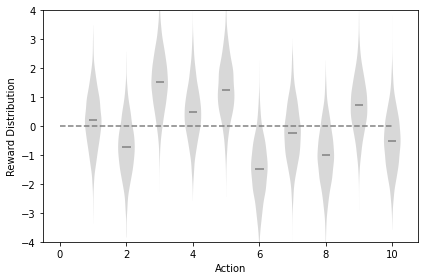

In [7]:
env = BanditEnv()

fig = plt.figure()
ax = fig.add_subplot(111)
parts = ax.violinplot(np.random.randn(2000,10) + env.means,
                      showmeans=True, showextrema=False)
for pc in parts['bodies']: pc.set_facecolor('gray')
parts['cmeans'].set_color('gray')
ax.plot([0,10],[0,0], color='gray', linestyle='--')
ax.set_ylim([-4, 4])
ax.set_xlabel("Action"); ax.set_ylabel("Reward Distribution")
plt.tight_layout()
plt.savefig('img/fig_0201.png')
plt.show()


In [10]:
env = BanditEnv()

runs_ep0_A, runs_ep0_R = [], []      # eps=0, greedy
runs_ep01_A, runs_ep01_R = [], []    # eps=0.1
runs_ep001_A, runs_ep001_R = [], []  # eps=0.01

print('v' + ' '*18 + 'v')  # poor man tqdm
for i in range(2000):
    _, hist_A, hist_R = simple_bandit(env, nb=1000, eps=0)
    _, runs_ep0_A.append(hist_A); runs_ep0_R.append(hist_R);
    
    _, hist_A, hist_R = simple_bandit(env, nb=1000, eps=0.1)
    _, runs_ep01_A.append(hist_A); runs_ep01_R.append(hist_R); 
    
    _, hist_A, hist_R = simple_bandit(env, nb=1000, eps=0.01)
    _, runs_ep001_A.append(hist_A); runs_ep001_R.append(hist_R);
    
    if i % 100 == 0: print('.', end='')
    
runs_ep0_A, runs_ep0_R = np.array(runs_ep0_A), np.array(runs_ep0_R)
runs_ep01_A, runs_ep01_R = np.array(runs_ep01_A), np.array(runs_ep01_R)
runs_ep001_A, runs_ep001_R = np.array(runs_ep001_A), np.array(runs_ep001_R)


v                  v
....................

In [11]:
# Calc average reward
avg_ep0_R = np.average(runs_ep0_R, axis=0)
avg_ep01_R = np.average(runs_ep01_R, axis=0)
avg_ep001_R = np.average(runs_ep001_R, axis=0)

# Calc "% optimal action"
max_A = np.argmax(env.means)
opt_ep0_A = np.average(runs_ep0_A==max_A, axis=0)
opt_ep01_A = np.average(runs_ep01_A==max_A, axis=0)
opt_ep001_A = np.average(runs_ep001_A==max_A, axis=0)


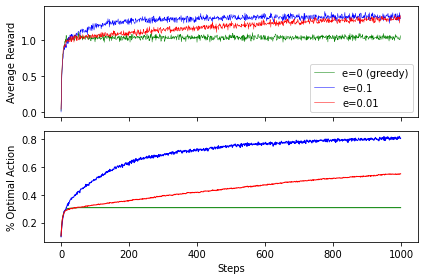

In [12]:
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(avg_ep0_R,   linewidth=0.5, color='green', label='e=0 (greedy)')
ax.plot(avg_ep01_R,  linewidth=0.5, color='blue',  label='e=0.1')
ax.plot(avg_ep001_R, linewidth=0.5, color='red',   label='e=0.01')
ax.set_ylabel('Average Reward')
ax.xaxis.set_ticklabels([])
ax.legend()

ax = fig.add_subplot(212)
ax.plot(opt_ep0_A,   linewidth=1., color='green', label='e=0 (greedy)')
ax.plot(opt_ep01_A,  linewidth=1., color='blue',  label='e=0.1')
ax.plot(opt_ep001_A, linewidth=1., color='red',   label='e=0.01')
ax.set_xlabel('Steps'); ax.set_ylabel('% Optimal Action')

plt.tight_layout()

plt.savefig('img/fig_0202.png')
plt.show()
